#  Title
### Data source: 
Requested data from <a href=https://www.the-numbers.com/>The Numbers</a> (of OpusData) and <a href=''>Inflation Calcuation</a>

## Module Imports and custom functions


In [1]:
import seaborn as sns
%matplotlib inline
from data_preprocess import *
sns.set_style('darkgrid')

 ### Load, Clean, and Adjust for Inflation
 

In [2]:
movie_data = load_clean_data()
movie_data = movie_data.sort_values(by=['profit'], ascending=False)
display(movie_data.head())
display(movie_data.describe())


,title,year,budget,rating,creative,source,genre,time,profit,sequel
695,Avatar,2009,425000000,PG-13,Science Fiction,Original Screenplay,Action,162.0,2351345279,0.0
1895,Avengers: Infinity War,2017,300000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,156.0,1748797682,1.0
1641,Star Wars Ep. VII: The Force Awakens,2015,306000000,PG-13,Science Fiction,Original Screenplay,Adventure,136.0,1747311220,1.0
1475,Jurassic World,2014,215000000,PG-13,Science Fiction,Based on Fiction Book/Short Story,Action,124.0,1433854864,1.0
1473,Furious 7,2014,190000000,PG-13,Contemporary Fiction,Original Screenplay,Action,137.0,1328722794,1.0


,year,budget,time,profit,sequel
count,1936.000000,1.936000e+03,1822.000000,1.936000e+03,1934.000000
mean,2011.261880,5.342857e+07,109.396817,1.062571e+08,0.152534
std,3.457548,5.368562e+07,19.644955,1.998624e+08,0.359630
min,2006.000000,1.000000e+07,0.000000,-1.104502e+08,0.000000
25%,2008.000000,1.900000e+07,97.000000,-5.267300e+05,0.000000
50%,2011.000000,3.275000e+07,108.000000,3.589142e+07,0.000000
75%,2014.000000,6.500000e+07,120.000000,1.237700e+08,0.000000
max,2018.000000,4.250000e+08,201.000000,2.351345e+09,1.000000


In [23]:
inflation_rate = pd.read_csv('data/inflation_rate.csv')
# inflation_rate[inflation_rate['Year']==2009.0]['Avg-Avg'].values
movie_data['inflation_rate' ] = movie_data.year.map(lambda x: inflation_rate[inflation_rate['Year']==x][
                                                                                 'Avg-Avg'].values[0]/100+1)

Top 5 ways to make the most profits at box office

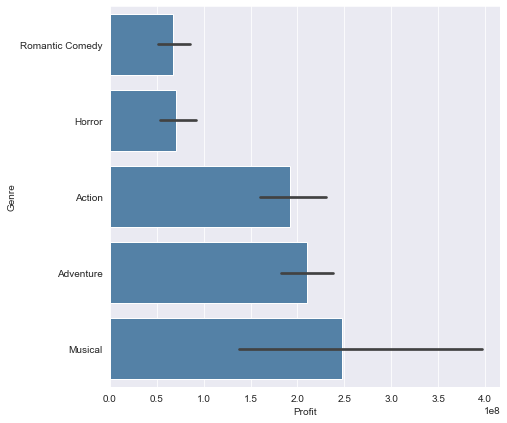

In [9]:
data_bar_graph(movie_data,'genre')

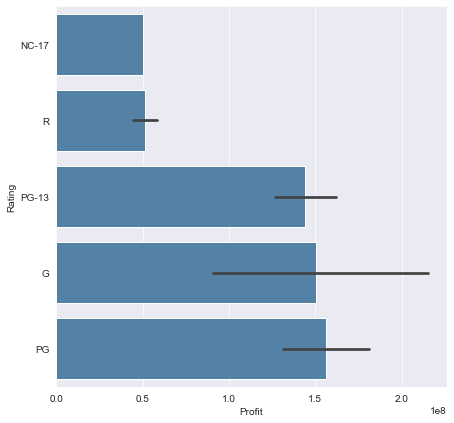

In [10]:
data_bar_graph(movie_data,'rating')

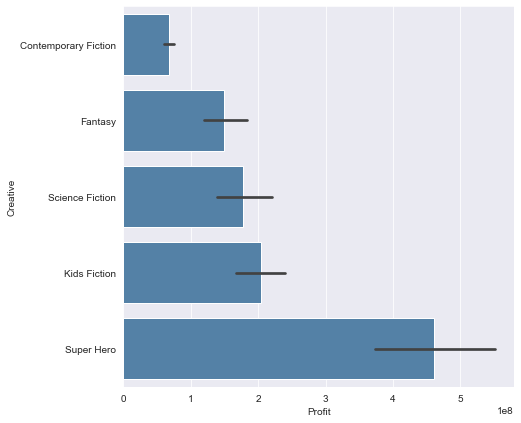

In [11]:
data_bar_graph(movie_data,'creative')

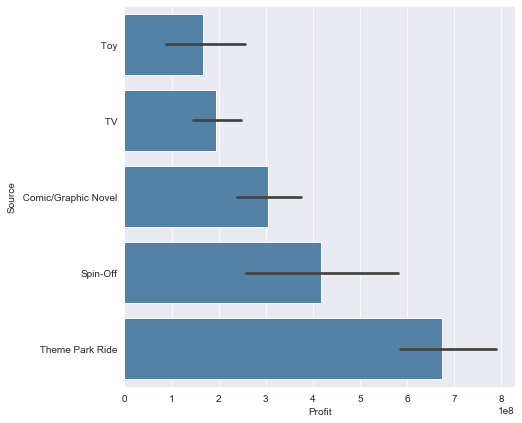

In [12]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
data_bar_graph(movie_data,'source')

Do we really want to sit in the movie that long?

[Text(0, 0.5, 'Ratio of movies'), (50, 200), Text(0.5, 0, 'Time (minutes)')]

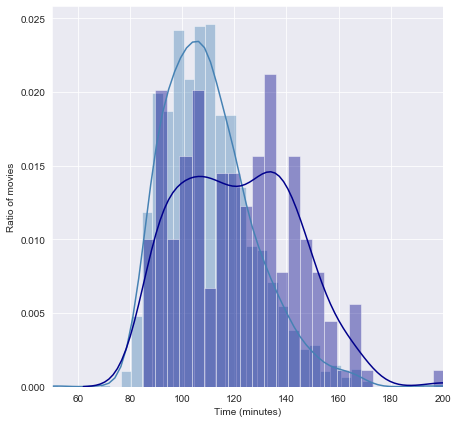

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.distplot(movie_data.time.dropna(), bins=50, color='steelblue')
sns.distplot(movie_data.iloc[0:int(movie_data.shape[0]*0.1)]['time'], bins=25, color='darkblue', ax=ax)
ax.set(xlim=(50,200),xlabel='Time (minutes)', ylabel='Ratio of movies')

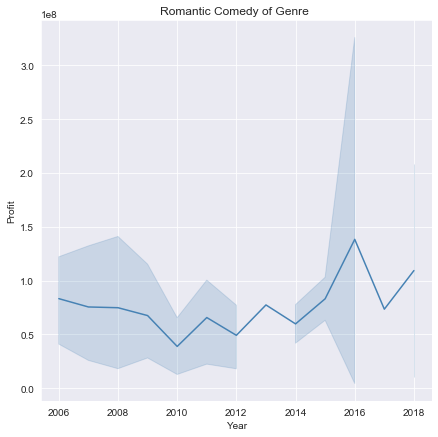

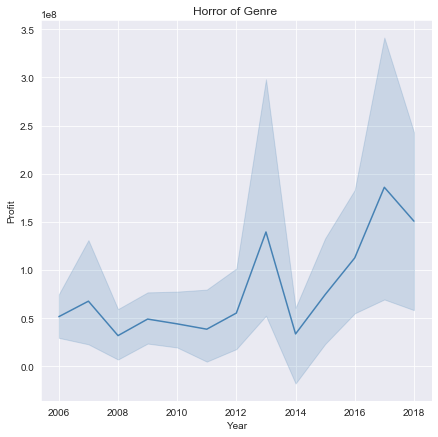

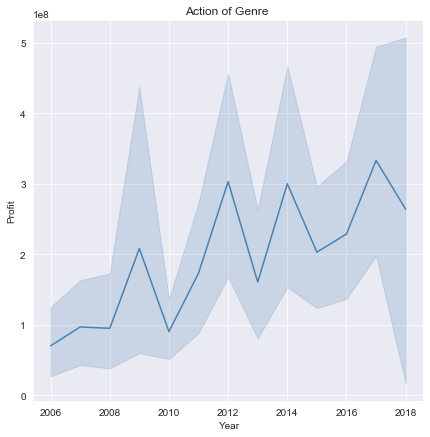

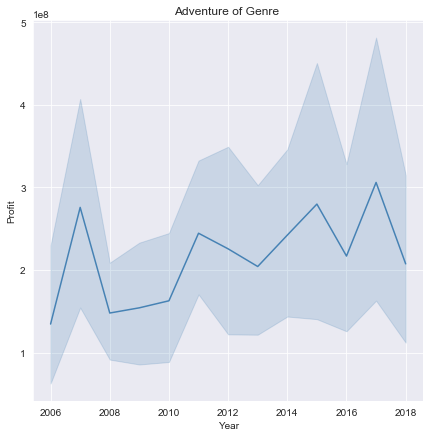

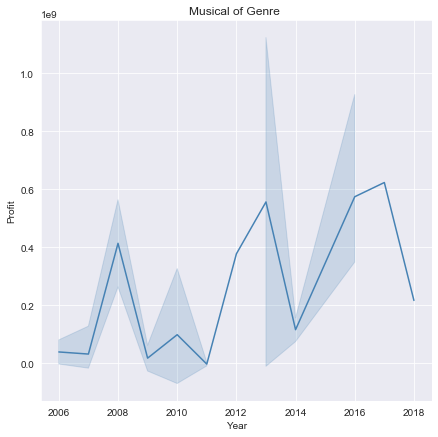

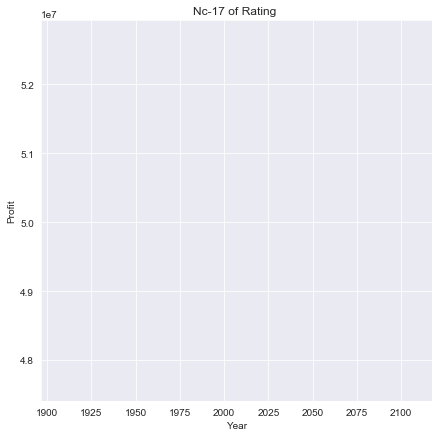

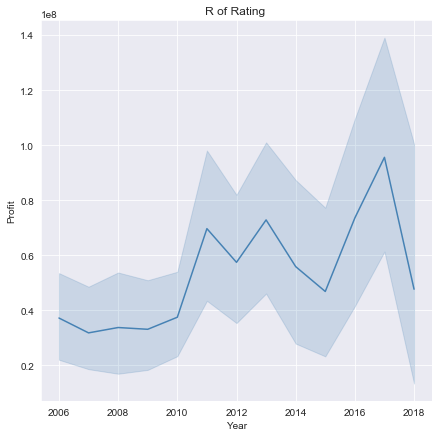

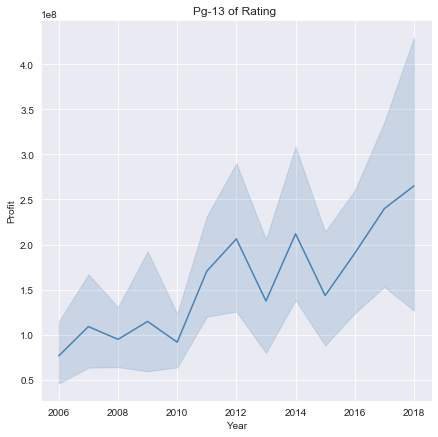

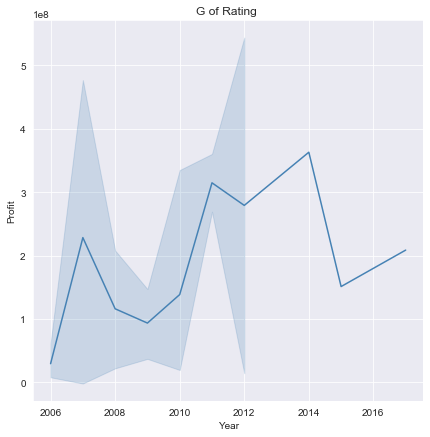

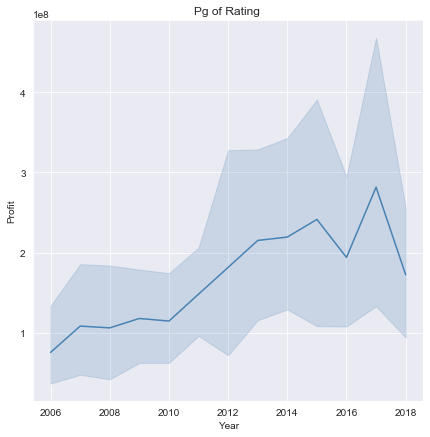

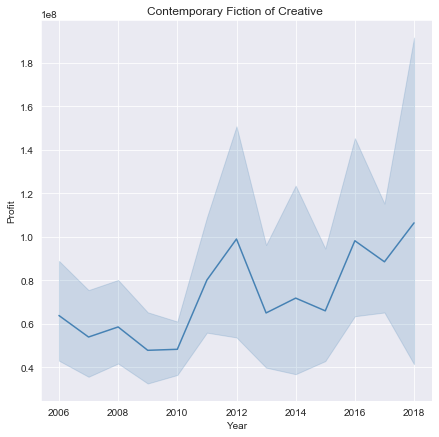

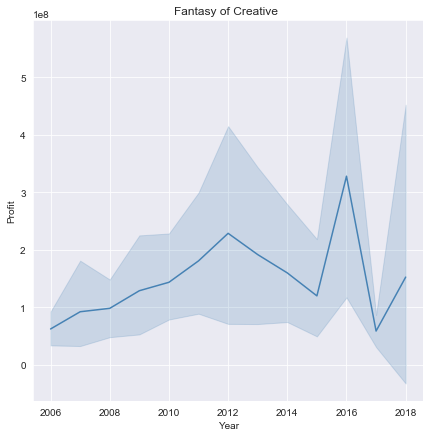

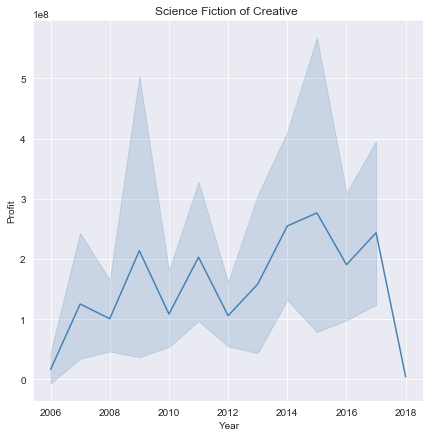

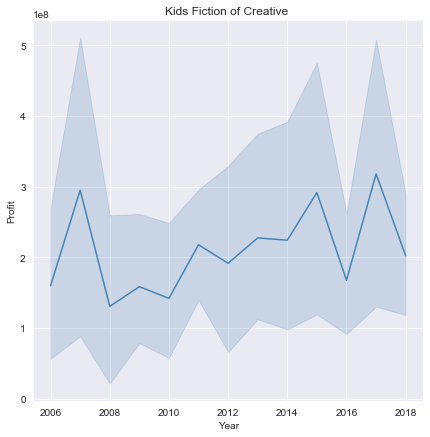

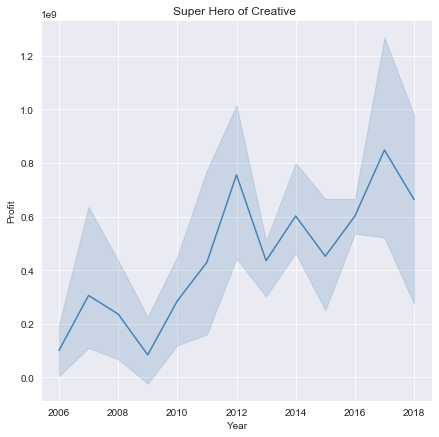

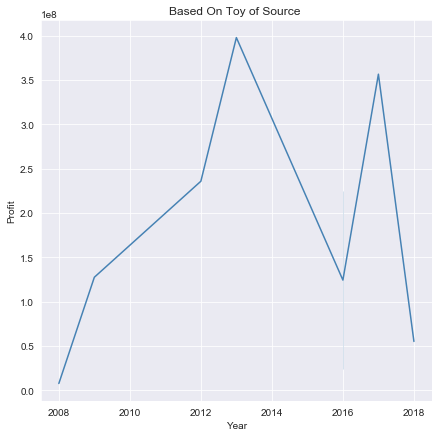

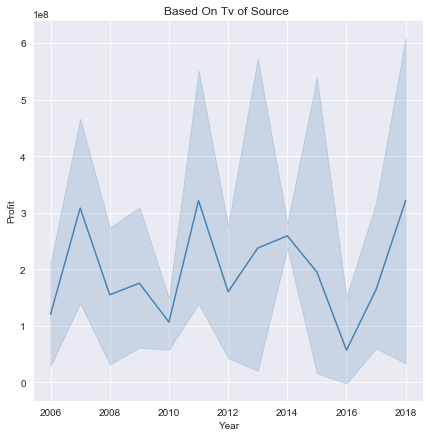

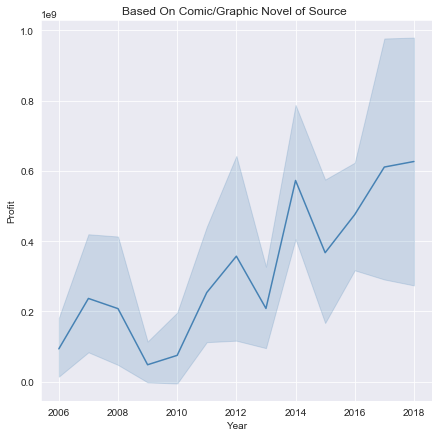

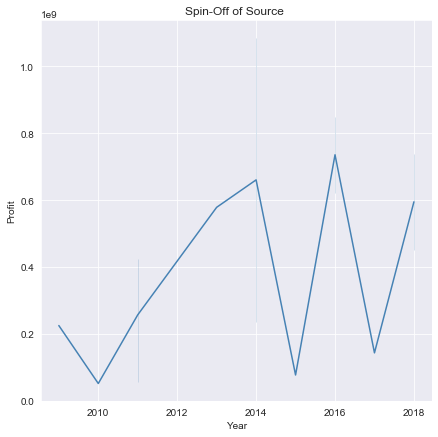

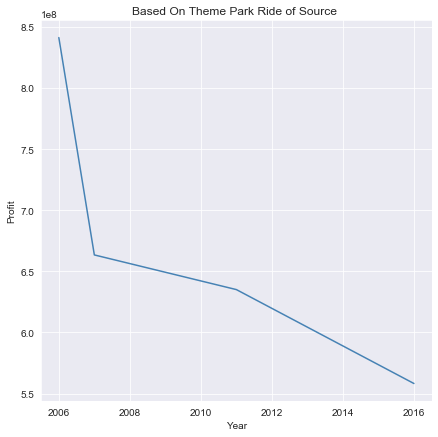

In [4]:
cols = ['genre', 'rating', 'creative', 'source']

for col in cols:
    avg_ = movie_data.groupby(col).agg('mean').reset_index().sort_values('profit')
    for topn in avg_[col][-5:]:
        data_line_graph(subset_df(movie_data,col,topn), col, topn)
        